In [ ]:
# Source: Stackoverflow Survey Data / Intitial data cleaning performed by teammates

In [240]:
import sys
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
import seaborn as sns
import mpld3
from matplotlib.pyplot import figure

#source: in class examples
# Study data files
pwd = os.path.abspath('.')
corr_path = os.path.join(pwd, 'smaller_corr_matrix.csv')
features_path = os.path.join(pwd, '2021_features.csv')
large_corr_path = os.path.join(pwd, 'corr_matrix.csv')
impact_path = os.path.join(pwd, 'impact_languages.csv')

# Read the data and the study results
corr_data = pd.read_csv(corr_path)
features_data =pd.read_csv(features_path)
large_corr_data = pd.read_csv(large_corr_path)
impact_data = pd.read_csv(impact_path)

In [186]:
corr_data.head()

,Unnamed: 0,ConvertedCompYearly,C++,HTML/CSS,JavaScript,PHP,Swift,Python,C,Rust,...,Flask,jQuery,Express,React.js,Angular.js,Ruby on Rails,Django,Microsoft Azure,AWS,Google Cloud Platform
0,ConvertedCompYearly,1.00,0.03,-0.13,-0.08,-0.11,0.04,0.03,0.02,0.06,...,0.03,-0.10,0.00,0.03,-0.02,0.07,-0.01,-0.02,0.16,0.08
1,C++,0.03,1.00,-0.10,-0.13,0.00,0.04,0.20,0.53,0.13,...,0.05,-0.05,-0.04,-0.11,0.00,-0.08,0.02,-0.04,-0.08,-0.01
2,HTML/CSS,-0.13,-0.10,1.00,0.56,0.19,0.00,-0.05,-0.07,-0.02,...,0.03,0.31,0.20,0.26,0.16,0.08,0.07,0.11,0.04,0.07
3,JavaScript,-0.08,-0.13,0.56,1.00,0.20,0.02,-0.08,-0.10,-0.02,...,0.03,0.33,0.26,0.38,0.17,0.13,0.06,0.11,0.14,0.10
4,PHP,-0.11,0.00,0.19,0.20,1.00,0.04,0.00,0.01,-0.03,...,-0.01,0.27,0.08,0.08,0.08,0.02,0.03,0.01,0.10,0.06


In [187]:
features_data.head()

,Unnamed: 0,ConvertedCompYearly,YearsCodePro,YearsCode,AWS,Bash/Shell,C++,COBOL,Cassandra,Clojure,...,Ruby on Rails,Rust,Scala,Swift,Terraform,TypeScript,Unity 3D,Vue.js,Xamarin,jQuery
0,15,103000.0,0,8,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,16,300000.0,15,20,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,24,130000.0,5,13,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,25,500000.0,5,6,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,30,105000.0,15,25,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [188]:
print(features_data.columns)

Index(['Unnamed: 0', 'ConvertedCompYearly', 'YearsCodePro', 'YearsCode', 'AWS',
       'Bash/Shell', 'C++', 'COBOL', 'Cassandra', 'Clojure', 'Crystal',
       'Delphi', 'Django', 'Drupal', 'DynamoDB', 'Elasticsearch', 'Flask',
       'Flow', 'Git', 'Go', 'Google Cloud Platform', 'Hadoop', 'Java',
       'JavaScript', 'Kubernetes', 'LISP', 'MariaDB', 'Microsoft Azure',
       'Node.js', 'Oracle', 'PHP', 'Pandas', 'Perl', 'PowerShell', 'Python',
       'Qt', 'React.js', 'Redis', 'Ruby on Rails', 'Rust', 'Scala', 'Swift',
       'Terraform', 'TypeScript', 'Unity 3D', 'Vue.js', 'Xamarin', 'jQuery'],
      dtype='object')


In [189]:
features_corr = features_data.corr()
features_corr

,Unnamed: 0,ConvertedCompYearly,YearsCodePro,YearsCode,AWS,Bash/Shell,C++,COBOL,Cassandra,Clojure,...,Ruby on Rails,Rust,Scala,Swift,Terraform,TypeScript,Unity 3D,Vue.js,Xamarin,jQuery
Unnamed: 0,1.000000,-0.032692,-0.006410,-0.015308,-0.000958,-0.021639,-0.019514,0.020492,0.023339,0.104721,...,0.022520,-0.103340,0.016470,-0.012351,0.008801,-0.038169,-0.017042,-0.022302,-0.008725,0.011358
ConvertedCompYearly,-0.032692,1.000000,0.275037,0.274138,0.131120,0.079833,0.049620,-0.019678,0.085345,0.080232,...,0.065800,0.082451,0.101493,0.047036,0.172194,0.018256,-0.038978,-0.067875,-0.026672,-0.110260
YearsCodePro,-0.006410,0.275037,1.000000,0.904673,0.001494,0.003584,0.035103,0.051177,0.026999,0.031123,...,-0.012316,-0.073748,0.013160,0.019344,0.010835,-0.094889,-0.041415,-0.034660,0.057083,0.080142
YearsCode,-0.015308,0.274138,0.904673,1.000000,-0.013211,0.037192,0.066385,0.047639,0.027113,0.042182,...,-0.025471,-0.048737,0.010180,0.018653,0.015468,-0.102338,-0.023397,-0.048120,0.052311,0.070731
AWS,-0.000958,0.131120,0.001494,-0.013211,1.000000,0.136274,-0.079807,0.011695,0.050040,0.087445,...,0.167237,0.042401,0.078755,0.039652,0.265981,0.116060,0.022865,0.107906,-0.016452,0.026266
Bash/Shell,-0.021639,0.079833,0.003584,0.037192,0.136274,1.000000,0.121056,0.015525,0.050375,0.029203,...,0.042857,0.090004,0.056846,0.005245,0.169492,0.009534,-0.012924,0.011768,-0.024463,0.003292
C++,-0.019514,0.049620,0.035103,0.066385,-0.079807,0.121056,1.000000,0.055523,0.002932,-0.045888,...,-0.077097,0.133428,-0.004217,0.037084,-0.060525,-0.077484,0.079245,-0.042258,0.028304,-0.048052
COBOL,0.020492,-0.019678,0.051177,0.047639,0.011695,0.015525,0.055523,1.000000,0.046266,-0.002781,...,0.022017,-0.002627,0.026302,0.035654,0.014681,0.000207,0.000183,0.017986,0.028215,0.040004
Cassandra,0.023339,0.085345,0.026999,0.027113,0.050040,0.050375,0.002932,0.046266,1.000000,0.063693,...,0.016060,0.047283,0.123954,0.004612,0.082471,-0.001005,0.001916,0.001356,-0.009712,0.001826
Clojure,0.104721,0.080232,0.031123,0.042182,0.087445,0.029203,-0.045888,-0.002781,0.063693,1.000000,...,0.001193,0.022976,0.066069,-0.012161,0.067265,-0.025632,-0.008085,-0.035348,-0.025220,-0.054912


In [190]:
aws_corr_dataframe = features_corr[["Kubernetes", "Terraform","Pandas", "jQuery", "Go", "React.js", "AWS", "PHP", "JavaScript", "PowerShell", "Java", "Python", "C++", "Redis", "Rust"]]
aws_corr_dataframe

,Kubernetes,Terraform,Pandas,jQuery,Go,React.js,AWS,PHP,JavaScript,PowerShell,Java,Python,C++,Redis,Rust
Unnamed: 0,-0.010915,0.008801,-0.003387,0.011358,-0.023554,0.018438,-0.000958,0.019802,0.011042,-0.017613,0.015439,-0.026485,-0.019514,-0.019696,-0.103340
ConvertedCompYearly,0.180554,0.172194,0.005202,-0.110260,0.164302,0.023004,0.131120,-0.101265,-0.094441,-0.073499,0.089519,0.047418,0.049620,0.122434,0.082451
YearsCodePro,-0.004160,0.010835,-0.124230,0.080142,-0.009142,-0.135778,0.001494,0.041007,-0.041663,0.026163,-0.005439,-0.130849,0.035103,-0.005688,-0.073748
YearsCode,-0.005633,0.015468,-0.107608,0.070731,-0.001501,-0.151423,-0.013211,0.044408,-0.057572,0.031631,0.012076,-0.091478,0.066385,-0.019131,-0.048737
AWS,0.192919,0.265981,0.066951,0.026266,0.158325,0.192633,1.000000,0.100536,0.138950,-0.072165,0.123976,0.114626,-0.079807,0.244755,0.042401
Bash/Shell,0.132375,0.169492,0.090703,0.003292,0.159581,0.034812,0.136274,0.064799,0.047189,0.114553,0.115361,0.244398,0.121056,0.110404,0.090004
C++,-0.044462,-0.060525,0.073354,-0.048052,0.062532,-0.098854,-0.079807,0.005061,-0.115152,0.035439,0.060165,0.197899,1.000000,-0.057239,0.133428
COBOL,0.020049,0.014681,0.033182,0.040004,0.018755,0.022996,0.011695,0.032169,0.027423,0.039566,0.056859,0.001088,0.055523,0.008313,-0.002627
Cassandra,0.126298,0.082471,0.027741,0.001826,0.086313,0.023991,0.050040,0.000285,-0.008114,-0.005851,0.104704,0.032039,0.002932,0.081579,0.047283
Clojure,0.052042,0.067265,0.000189,-0.054912,-0.000614,0.089460,0.087445,-0.027237,-0.036004,-0.047924,0.044334,-0.022675,-0.045888,0.015006,0.022976


In [191]:
large_corr_data.head()

,Unnamed: 0,ConvertedCompYearly,C++,HTML/CSS,JavaScript,Objective-C,PHP,Swift,Python,Assembly,...,Gatsby,Drupal,Heroku,Microsoft Azure,AWS,Google Cloud Platform,DigitalOcean,Oracle Cloud Infrastructure,IBM Cloud or Watson,total_2
0,ConvertedCompYearly,1.00,0.00,-0.01,0.00,0.01,0.00,0.03,0.00,0.01,...,-0.01,-0.01,-0.01,0.02,0.03,0.03,0.00,0.01,-0.01,0.02
1,C++,0.00,1.00,-0.10,-0.12,0.09,0.00,0.04,0.20,0.27,...,-0.03,0.01,-0.06,-0.03,-0.09,-0.01,0.01,0.00,0.02,0.08
2,HTML/CSS,-0.01,-0.10,1.00,0.56,0.00,0.21,0.01,-0.05,-0.01,...,0.11,0.08,0.14,0.10,0.04,0.06,0.11,0.01,0.02,0.45
3,JavaScript,0.00,-0.12,0.56,1.00,0.02,0.20,0.03,-0.08,-0.02,...,0.12,0.08,0.17,0.10,0.14,0.09,0.13,0.00,0.01,0.51
4,Objective-C,0.01,0.09,0.00,0.02,1.00,0.08,0.47,0.00,0.05,...,0.03,0.08,0.04,0.01,0.03,0.04,0.05,0.01,0.06,0.16


In [192]:
print(large_corr_data.columns)

Index(['Unnamed: 0', 'ConvertedCompYearly', 'C++', 'HTML/CSS', 'JavaScript',
       'Objective-C', 'PHP', 'Swift', 'Python', 'Assembly', 'C', 'R', 'Rust',
       'TypeScript', 'Bash/Shell', 'SQL', 'C#', 'Java', 'Node.js',
       'PowerShell', 'Ruby', 'Perl', 'Matlab', 'Kotlin', 'Julia', 'Haskell',
       'Delphi', 'Go', 'Scala', 'Dart', 'VBA', 'Groovy', 'Clojure', 'APL',
       'LISP', 'F#', 'Elixir', 'Erlang', 'Crystal', 'COBOL', 'PostgreSQL',
       'SQLite', 'Elasticsearch', 'Redis', 'MySQL', 'Microsoft SQL Server',
       'Oracle', 'MongoDB', 'MariaDB', 'DynamoDB', 'Couchbase', 'Firebase',
       'Cassandra', 'IBM DB2', 'Laravel', 'Symfony', 'Angular', 'Flask',
       'Vue.js', 'jQuery', 'Express', 'React.js', 'Angular.js',
       'Ruby on Rails', 'Django', 'FastAPI', 'ASP.NET Core ', 'Spring',
       'Svelte', 'ASP.NET', 'Gatsby', 'Drupal', 'Heroku', 'Microsoft Azure',
       'AWS', 'Google Cloud Platform', 'DigitalOcean',
       'Oracle Cloud Infrastructure', 'IBM Cloud or Watson

In [193]:
impact_data.head()

,Feature,Coorelation,Column Impact,Impact Rank
0,jQuery,-0.110260,4.52,1
1,Go,0.164302,4.11,2
2,React.js,0.023004,4.07,3
3,AWS,0.131120,3.92,4
4,PHP,-0.101265,3.46,5


In [194]:
column_impact_df = impact_data.drop(['Coorelation', 'Impact Rank'], axis=1)
new_df = column_impact_df.rename(columns={"Feature": "feature", "Column Impact ": "column_impact"})
new_df

,feature,column_impact
0,jQuery,4.52
1,Go,4.11
2,React.js,4.07
3,AWS,3.92
4,PHP,3.46
5,JavaScript,3.32
6,PowerShell,3.23
7,Kubernetes,3.16
8,Java,2.48
9,Python,2.45


In [195]:
new_df.dtypes
new_df

,feature,column_impact
0,jQuery,4.52
1,Go,4.11
2,React.js,4.07
3,AWS,3.92
4,PHP,3.46
5,JavaScript,3.32
6,PowerShell,3.23
7,Kubernetes,3.16
8,Java,2.48
9,Python,2.45


In [196]:
new_df['column_impact'] = new_df['column_impact']
new_df

,feature,column_impact
0,jQuery,4.52
1,Go,4.11
2,React.js,4.07
3,AWS,3.92
4,PHP,3.46
5,JavaScript,3.32
6,PowerShell,3.23
7,Kubernetes,3.16
8,Java,2.48
9,Python,2.45


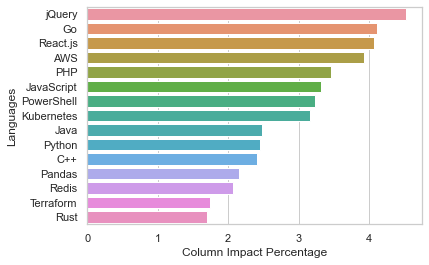

In [204]:

# sns.set_style('darkgrid')

sns.set_theme(style="whitegrid")

ax = sns.barplot(x="column_impact", y="feature", data=new_df)

ax.set(xlabel="Column Impact Percentage", ylabel="Languages")
plt.savefig("figure3.png", bbox_inches='tight')

In [206]:
ce_impact_df = impact_data.drop(['Column Impact ', 'Impact Rank'], axis=1)

ce_impact_df 

,Feature,Coorelation
0,jQuery,-0.110260
1,Go,0.164302
2,React.js,0.023004
3,AWS,0.131120
4,PHP,-0.101265
5,JavaScript,-0.094441
6,PowerShell,-0.073499
7,Kubernetes,0.180554
8,Java,0.089519
9,Python,0.047418


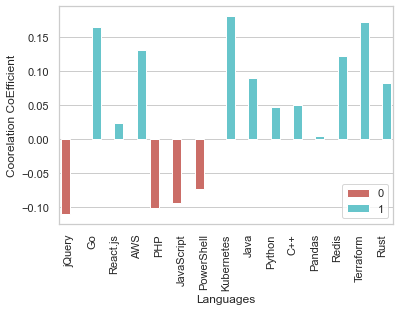

In [236]:
# sns.set_style('darkgrid')

sns.set_theme(style="whitegrid")



# sns.barplot(x="Feature", y="Coorelation", palette="vlag", ax=ax1)
# ax1.axhline(0, color="k", clip_on=False)
# ax1.set_ylabel("Corr CoEff")


# ax = sns.barplot(x="column_impact", y="feature", data=new_df)

# ax.set(xlabel="Column Impact Percentage", ylabel="Languages")
# plt.savefig("figure3.png", bbox_inches='tight')
coorelation = ce_impact_df['Coorelation']
feature = ce_impact_df['Feature']
colors = [1 if c >= 0 else 0 for c in coorelation]
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.barplot(
    x=feature,
    y=coorelation,
    hue=colors, # Here I am!
    palette=sns.color_palette("hls", 2)
    )
g.set(xlabel="Languages", ylabel="Coorelation CoEfficient")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.savefig("figure4.png", bbox_inches='tight')

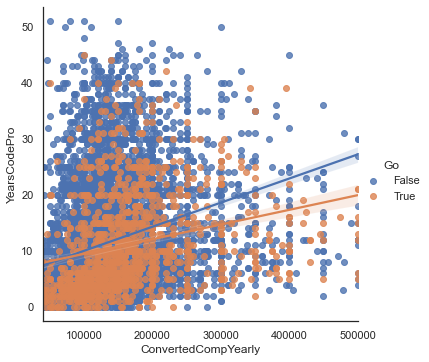

In [63]:
g = sns.lmplot(
    data=features_data,
    x="ConvertedCompYearly", y="YearsCodePro", hue="Go",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("ConvertedCompYearly", "YearsCodePro")

In [242]:
corr = corr_data.corr()
fig1 = corr.style.background_gradient(cmap='Blues')
fig1
plt.savefig("figure5.png", bbox_inches='tight')



<Figure size 432x288 with 0 Axes>

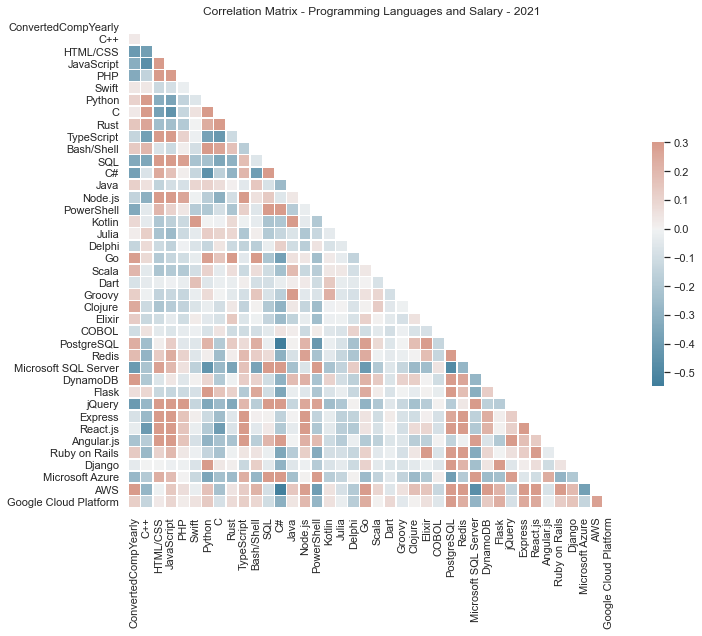

In [69]:
# Source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# https://stackoverflow.com/questions/6774086/how-to-adjust-padding-with-cutoff-or-overlapping-labels

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# # Generate a large random dataset
# rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr2 = corr_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
f.set_tight_layout(True)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation Matrix - Programming Languages and Salary - 2021')

plt.savefig("figure2.png")